In [1]:
import xlrd
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 파악 (EDA: 탐색적 데이터 분석)

## 데이터셋 기본 정보 파악

In [2]:
rate = pd.read_excel("garbage_rate_data.csv")
rate.head()

,year,location,세금 비율,차량대수 비율,인구(여)비율,외국인 비율,면적 비율,0대 비율,10대 비율,20대 비율,...,90대 비율,100대 비율,도소매 종사자 비율,숙박 및 음식점 비율,도시가스 비율,석유 비율,공무원 1인당 담당인구,관광지당 관광객,흡연율,가정생활 폐기물 비율
0,2014,종로구,4.009350,0.304305,0.507457,0.050507,0.000145,0.058061,0.097228,0.158832,...,0.004772,0.001191,0.261304,0.159601,0.496020,0.004228,140.7,2.058948e+06,22.5,0.001759
1,2014,중구,7.628458,0.405771,0.501186,0.059915,0.000073,0.064906,0.075565,0.147474,...,0.004434,0.000954,0.690473,0.229492,0.499519,0.018513,112.5,1.304386e+06,22.0,0.003014
2,2014,용산구,2.085745,0.301904,0.511644,0.055871,0.000088,0.075262,0.087222,0.135447,...,0.004053,0.001048,0.117116,0.066935,0.469033,0.011188,206.7,3.530781e+06,21.3,0.000982
3,2014,성동구,1.165122,0.300591,0.502621,0.025684,0.000055,0.077719,0.090582,0.151485,...,0.002814,0.000540,0.092135,0.034131,0.434139,0.004551,253.5,0.000000e+00,24.4,0.000752
4,2014,광진구,0.736490,0.251204,0.509742,0.037154,0.000045,0.070903,0.099344,0.169071,...,0.002369,0.000387,0.051493,0.044330,0.454452,0.003800,329.9,0.000000e+00,18.1,0.000792


In [3]:
rate.columns

Index(['year', 'location', '세금 비율', '차량대수 비율', '인구(여)비율', '외국인 비율', '면적 비율',
       '0대 비율', '10대 비율', '20대 비율', '30대 비율', '40대 비율', '50대 비율', '60대 비율',
       '70대 비율', '80대 비율', '90대 비율', '100대 비율', '도소매 종사자 비율', '숙박 및 음식점 비율',
       '도시가스 비율', '석유 비율', '공무원 1인당 담당인구', '관광지당 관광객', '흡연율', '가정생활 폐기물 비율'],
      dtype='object')

In [4]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          150 non-null    int64  
 1   location      150 non-null    object 
 2   세금 비율         150 non-null    float64
 3   차량대수 비율       150 non-null    float64
 4   인구(여)비율       150 non-null    float64
 5   외국인 비율        150 non-null    float64
 6   면적 비율         150 non-null    float64
 7   0대 비율         150 non-null    float64
 8   10대 비율        150 non-null    float64
 9   20대 비율        150 non-null    float64
 10  30대 비율        150 non-null    float64
 11  40대 비율        150 non-null    float64
 12  50대 비율        150 non-null    float64
 13  60대 비율        150 non-null    float64
 14  70대 비율        150 non-null    float64
 15  80대 비율        150 non-null    float64
 16  90대 비율        150 non-null    float64
 17  100대 비율       150 non-null    float64
 18  도소매 종사자 비율    150 non-null    

<ipython-input-5-f8f8e3a4bfa6>:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  rate[numerical_columns].hist(ax=ax)


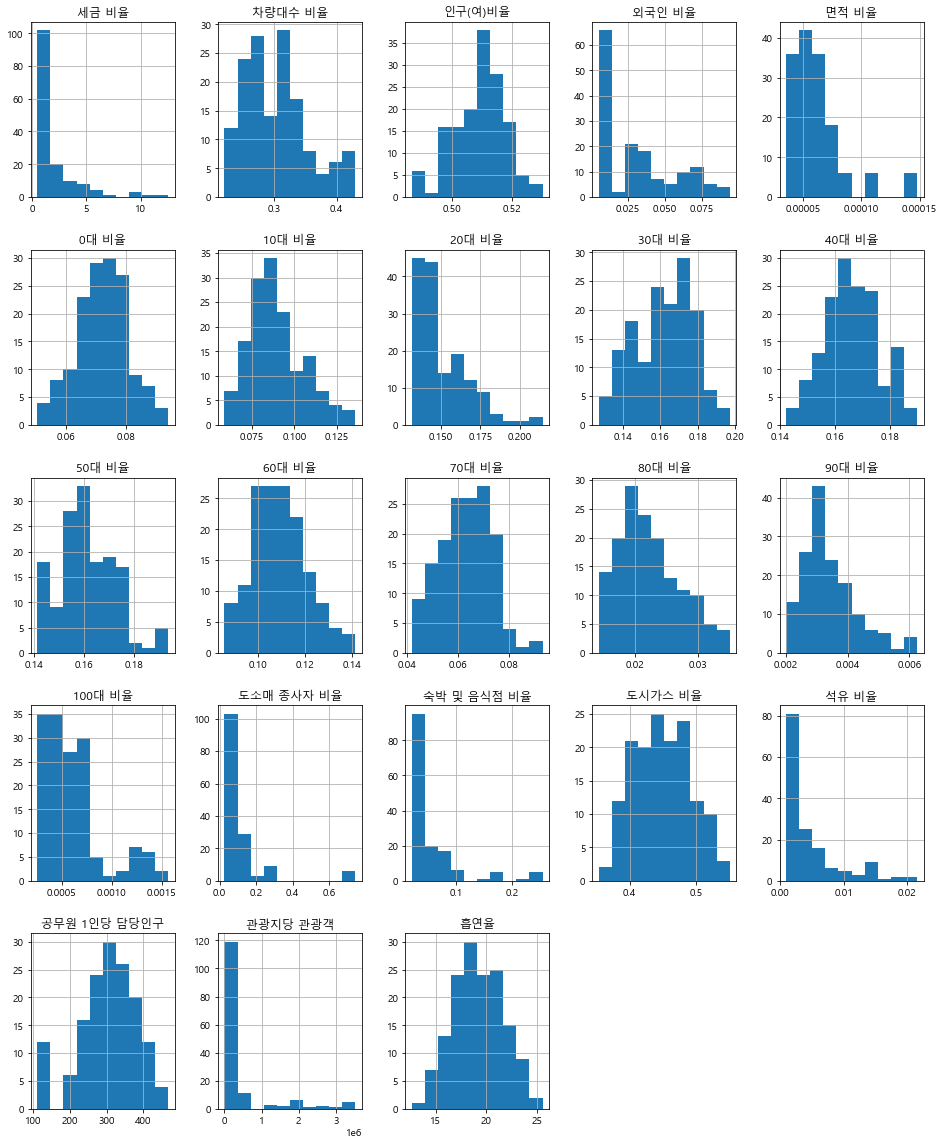

In [5]:
# numerical features (except 'year' & "'location','가정생활폐기물')
numerical_columns = ['세금 비율', '차량대수 비율', '인구(여)비율', '외국인 비율', '면적 비율', '0대 비율', '10대 비율',
       '20대 비율', '30대 비율', '40대 비율', '50대 비율', '60대 비율', '70대 비율', '80대 비율',
       '90대 비율', '100대 비율', '도소매 종사자 비율', '숙박 및 음식점 비율', '도시가스 비율', '석유 비율',
       '공무원 1인당 담당인구', '관광지당 관광객', '흡연율']

fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성
plt.rcParams['font.family'] = 'Malgun Gothic'
rate[numerical_columns].hist(ax=ax)
plt.show()

# 데이터 전처리 preprocessing

In [6]:
# 'year','location','가정생활폐기물' 들은 독립변수에 해당하지 않기 때문에 제거
rate=rate.drop(['year','location'], axis = 1)

상관성있는 값들을 제거한다.

In [7]:
rate.corr()

,세금 비율,차량대수 비율,인구(여)비율,외국인 비율,면적 비율,0대 비율,10대 비율,20대 비율,30대 비율,40대 비율,...,90대 비율,100대 비율,도소매 종사자 비율,숙박 및 음식점 비율,도시가스 비율,석유 비율,공무원 1인당 담당인구,관광지당 관광객,흡연율,가정생활 폐기물 비율
세금 비율,1.000000,0.679853,0.113185,0.362277,0.515382,-0.221034,-0.183643,0.031296,0.073292,-0.021614,...,0.593829,0.561963,0.948153,0.952117,0.495500,0.647822,-0.564834,0.481980,-0.116818,0.894987
차량대수 비율,0.679853,1.000000,0.080223,0.167351,0.327033,0.300659,0.129581,-0.353713,0.214001,0.354218,...,0.185579,0.018859,0.602838,0.536073,0.077201,0.605323,-0.120252,0.203270,-0.397078,0.448218
인구(여)비율,0.113185,0.080223,1.000000,-0.495043,0.272474,0.177178,0.359356,0.030726,-0.147073,0.223593,...,0.376232,0.138528,-0.055661,0.104275,-0.099012,0.054665,0.075143,0.164356,-0.398631,0.054125
외국인 비율,0.362277,0.167351,-0.495043,1.000000,0.127416,-0.349784,-0.641826,0.240178,0.261706,-0.315747,...,0.216627,0.482349,0.430771,0.422478,0.633441,0.248173,-0.578150,0.341439,0.158649,0.387261
면적 비율,0.515382,0.327033,0.272474,0.127416,1.000000,-0.184163,0.019861,-0.023545,-0.136748,0.107433,...,0.621645,0.595472,0.391914,0.590408,0.289505,0.267807,-0.479094,0.552268,-0.087727,0.508233
0대 비율,-0.221034,0.300659,0.177178,-0.349784,-0.184163,1.000000,0.570267,-0.556227,0.335466,0.651358,...,-0.516294,-0.576825,-0.248810,-0.327873,-0.660103,0.109349,0.608017,-0.253982,-0.272207,-0.381321
10대 비율,-0.183643,0.129581,0.359356,-0.641826,0.019861,0.570267,1.000000,-0.461356,-0.294247,0.825760,...,-0.292035,-0.468026,-0.253044,-0.230323,-0.716147,-0.140207,0.543946,-0.178226,-0.249580,-0.280205
20대 비율,0.031296,-0.353713,0.030726,0.240178,-0.023545,-0.556227,-0.461356,1.000000,0.234272,-0.603318,...,0.112402,0.280418,0.032343,0.145332,0.668786,-0.175633,-0.220250,0.033925,0.109625,0.165380
30대 비율,0.073292,0.214001,-0.147073,0.261706,-0.136748,0.335466,-0.294247,0.234272,1.000000,-0.059140,...,-0.365128,-0.134411,0.080196,0.051713,0.265325,0.355844,0.212709,0.032274,0.013146,-0.041215
40대 비율,-0.021614,0.354218,0.223593,-0.315747,0.107433,0.651358,0.825760,-0.603318,-0.059140,1.000000,...,-0.308205,-0.329205,-0.070547,-0.077519,-0.545058,0.045725,0.337418,-0.037038,-0.172701,-0.176064


C:\Users\passion\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\passion\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


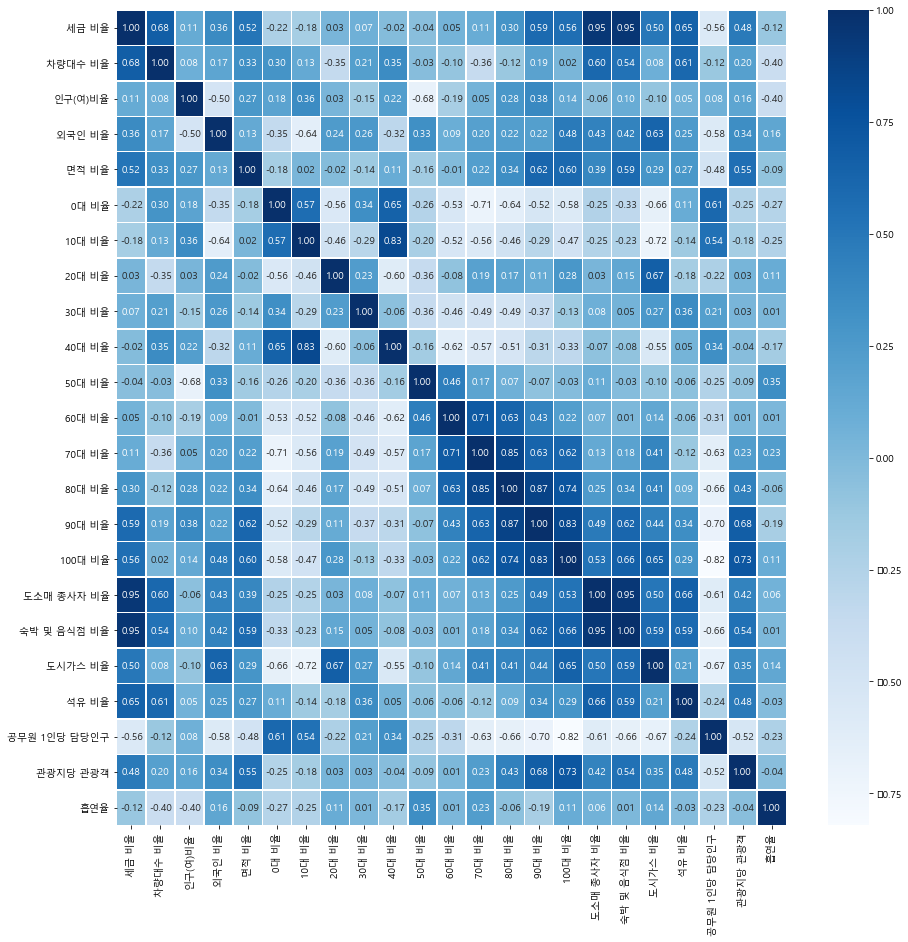

In [8]:
plt.figure(figsize=(15,15))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.heatmap(data = rate[numerical_columns].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [9]:
# 숙박 및 음식점 비율과 도소매 종사자 비율이 같은 의미를 공유하고 있고 상관성이 높아서 제거
# 세금또한 도소매 종사자와 높은 correlation을 공유하기 있기때문에 제거한다
# 이것들은 제거해도 모델 알스퀘어가 높아서 괜찮다
rate = rate.drop(['숙박 및 음식점 비율','세금 비율'], axis = 1)

C:\Users\passion\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\passion\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


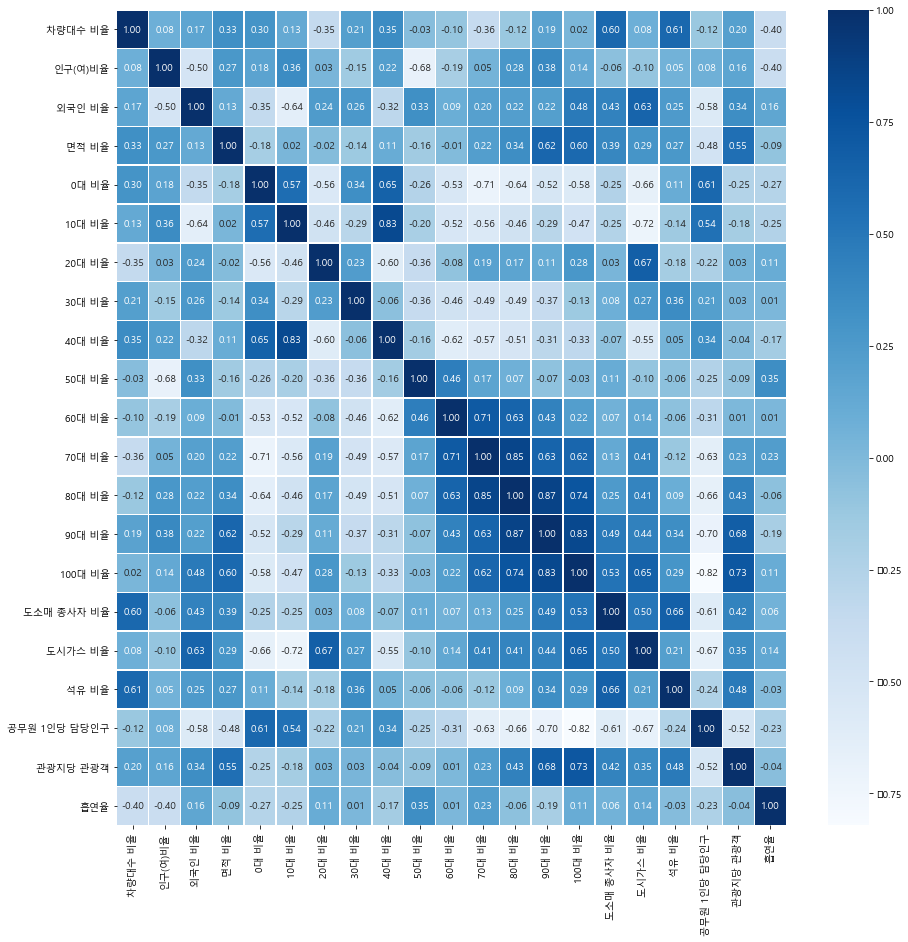

In [10]:
numerical_columns = [ '차량대수 비율', '인구(여)비율', '외국인 비율', '면적 비율', '0대 비율', '10대 비율',
       '20대 비율', '30대 비율', '40대 비율', '50대 비율', '60대 비율', '70대 비율', '80대 비율',
       '90대 비율', '100대 비율', '도소매 종사자 비율',  '도시가스 비율', '석유 비율',
       '공무원 1인당 담당인구', '관광지당 관광객', '흡연율']
plt.figure(figsize=(15,15))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.heatmap(data = rate[numerical_columns].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

train, test set 구별한다

In [11]:
X_train = rate.drop(['가정생활 폐기물 비율'],axis = 1 )
X_train = X_train.loc[:124, :]
y_train = rate.loc[:124,'가정생활 폐기물 비율']

In [12]:
X_test = rate.drop(['가정생활 폐기물 비율'],axis = 1 )
X_test = X_test.loc[125:, :]
y_test = rate.loc[125:,'가정생활 폐기물 비율']

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(125, 21)
(125,)
(25, 21)
(25,)


scaling한다

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# modeling

In [15]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train_scaled, y_train)

# predict in test set
y_test_hat = lr.predict(X_test_scaled)

train set에 대한 performance와 test set에 대한 performance를 확인해보겠다

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_hat = lr.predict(X_train_scaled)
y_test_hat = lr.predict(X_test_scaled)

print('performance for TRAIN--------')
print('train MAE : ', mean_absolute_error(y_train, y_train_hat))
print('train RMSE : ', mean_squared_error(y_train, y_train_hat)**0.5)
print('train R_square : ', r2_score(y_train, y_train_hat))

print('performance for TEST--------')
print('test MAE : ', mean_absolute_error(y_test, y_test_hat))
print('test RMSE : ', mean_squared_error(y_test, y_test_hat)**0.5)
print('test R_square : ', r2_score(y_test, y_test_hat))

performance for TRAIN--------
train MAE :  6.610491109630599e-05
train RMSE :  8.87368614707804e-05
train R_square :  0.9693932859345169
performance for TEST--------
test MAE :  0.00016514166894166665
test RMSE :  0.00020475691301605529
test R_square :  0.8265119984495288


In [17]:
y_test_hat

array([0.00197805, 0.003066  , 0.0011026 , 0.00082065, 0.00083672,
       0.00097287, 0.00076166, 0.00077335, 0.00081512, 0.00076743,
       0.00068911, 0.00059345, 0.00098302, 0.00110348, 0.00053036,
       0.00061462, 0.00063506, 0.00092367, 0.00085114, 0.0008362 ,
       0.00078327, 0.00102816, 0.00125369, 0.00060361, 0.00065136])

In [18]:
print(lr.coef_)

[-1.24878076e-04  4.62970454e-06 -6.68981007e-05  5.60624095e-05
  5.69014401e+08  1.07515811e+09  1.07111398e+09  1.05082185e+09
  6.24453366e+08  7.85454019e+08  7.12058171e+08  6.80291303e+08
  3.04574743e+08  5.42240184e+07  1.94871148e+07  5.02381479e-04
  1.57266925e-04 -5.04388831e-05 -6.32721845e-06  2.70999584e-05
  9.93198521e-06]


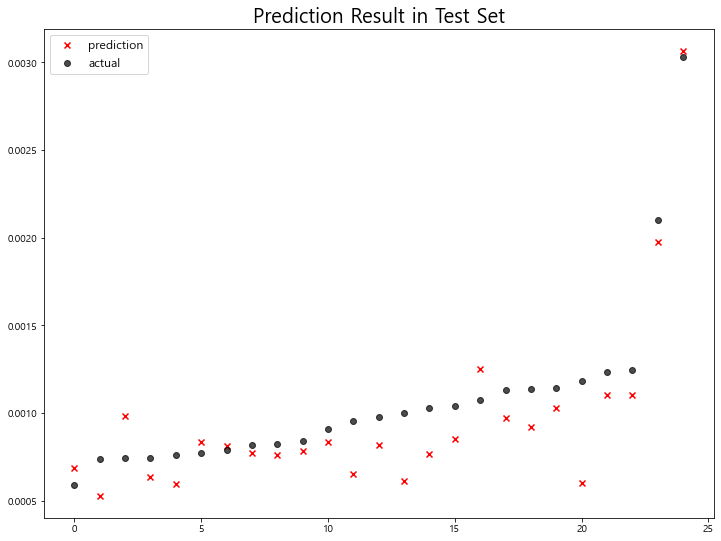

In [19]:
df = pd.DataFrame({'actual': y_test, 'prediction': y_test_hat})
df = df.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()


In [20]:
import statsmodels.api as sm

X_train_2 = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_train_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            가정생활 폐기물 비율   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     164.4
Date:                Mon, 23 May 2022   Prob (F-statistic):           2.66e-69
Time:                        17:36:15   Log-Likelihood:                 988.75
No. Observations:                 125   AIC:                            -1935.
Df Residuals:                     104   BIC:                            -1876.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009   8.71e-06    108.200      0.000       0.001       0.001
x1            -0.0001   2.78e-05     -4.508      0.000      -0.000   -7.01e-05
x2          2.224e-06   2.14e-05      0.104      0.918   -4.02e-05    4.47e-05
x3         -6.986e-05   2.27e-05     -3.080      0.003      -0.000   -2.49e-05
x4          5.565e-05   1.61e-05      3.451      0.001    2.37e-05    8.76e-05
x5             0.0001   2.77e-05      4.592      0.000    7.24e-05       0.000
x6         -3.727e-05   4.45e-05     -0.838      0.404      -0.000    5.09e-05
x7          3.285e-05   2.57e-05      1.278      0.204   -1.81e-05    8.38e-05
x8          -6.42e-05   2.47e-05     -2.597      0.011      -0.000   -1.52e-05
x9         -4.384e-06    3.6e-05     -0.122      0.903   -7.57e-05    6.69e-05
x10         8.339e-05   2.55e-05      3.267      0.001    3.28e-05       0.000
x11        -8.423e-05   2.65e-05     -3.175      0.002      -0.000   -3.16e-05
x12        -1.552e-05   3.56e-05     -0.436      0.664   -8.61e-05     5.5e-05
x13         2.906e-06   4.38e-05      0.066      0.947    -8.4e-05    8.98e-05
x14            0.0002   5.63e-05      3.049      0.003       6e-05       0.000
x15           -0.0001   3.45e-05     -3.813      0.000      -0.000   -6.31e-05
x16            0.0005   2.23e-05     22.577      0.000       0.000       0.001
x17            0.0002   3.02e-05      5.237      0.000    9.84e-05       0.000
x18        -5.195e-05   1.91e-05     -2.721      0.008   -8.98e-05   -1.41e-05
x19        -5.579e-06   3.28e-05     -0.170      0.865   -7.06e-05    5.94e-05
x20          2.76e-05   1.99e-05      1.389      0.168   -1.18e-05     6.7e-05
x21         9.485e-06   1.45e-05      0.654      0.515   -1.93e-05    3.82e-05
==============================================================================
Omnibus:                        4.554   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                6.071
Skew:                           0.041   Prob(JB):                       0.0480
Kurtosis:                       4.077   Cond. No.                     1.61e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.54e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

1,3,4,5,8,10,11,14,15,16,17,18의 변수들이 유의미하다고 판단된다.

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(2)

,features,VIF Factor
0,차량대수 비율,10.16
1,인구(여)비율,6.05
2,외국인 비율,6.78
3,면적 비율,3.43
4,0대 비율,816.35
5,10대 비율,1735.44
6,20대 비율,903.48
7,30대 비율,2421.35
8,40대 비율,4811.15
9,50대 비율,1099.59


### 최종모델

In [65]:
X_train = rate[['외국인 비율','면적 비율','도소매 종사자 비율','석유 비율','가정생활 폐기물 비율']]
X_test = rate[['외국인 비율','면적 비율','도소매 종사자 비율','석유 비율','가정생활 폐기물 비율']]
X_train

,외국인 비율,면적 비율,도소매 종사자 비율,석유 비율,가정생활 폐기물 비율
0,0.050507,0.000145,0.261304,0.004228,0.001759
1,0.059915,0.000073,0.690473,0.018513,0.003014
2,0.055871,0.000088,0.117116,0.011188,0.000982
3,0.025684,0.000055,0.092135,0.004551,0.000752
4,0.037154,0.000045,0.051493,0.003800,0.000792
...,...,...,...,...,...
145,0.033325,0.000057,0.029573,0.001258,0.000840
146,0.009839,0.000108,0.153103,0.005615,0.001145
147,0.009160,0.000072,0.261602,0.005378,0.001075
148,0.009931,0.000050,0.093453,0.006918,0.001184


In [66]:
X_train = X_train.drop(['가정생활 폐기물 비율'],axis = 1 )
X_train = X_train.loc[:124, :]
y_train = rate.loc[:124,'가정생활 폐기물 비율']

In [67]:
X_test =X_test.drop(['가정생활 폐기물 비율'],axis = 1 )
X_test = X_test.loc[125:, :]
y_test = rate.loc[125:,'가정생활 폐기물 비율']

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
y_test

125    0.002100
126    0.003031
127    0.001245
128    0.000981
129    0.000910
130    0.001133
131    0.000822
132    0.000817
133    0.000791
134    0.001028
135    0.000591
136    0.000762
137    0.000743
138    0.001237
139    0.000737
140    0.001002
141    0.000743
142    0.001139
143    0.001041
144    0.000771
145    0.000840
146    0.001145
147    0.001075
148    0.001184
149    0.000953
Name: 가정생활 폐기물 비율, dtype: float64

In [70]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train_scaled, y_train)

# predict in test set
y_test_hat = lr.predict(X_test_scaled)

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_hat = lr.predict(X_train_scaled)
y_test_hat = lr.predict(X_test_scaled)

print('performance for TRAIN--------')
print('train MAE : ', mean_absolute_error(y_train, y_train_hat))
print('train RMSE : ', mean_squared_error(y_train, y_train_hat)**0.5)
print('train R_square : ', r2_score(y_train, y_train_hat))

print('performance for TEST--------')
print('test MAE : ', mean_absolute_error(y_test, y_test_hat))
print('test RMSE : ', mean_squared_error(y_test, y_test_hat)**0.5)
print('test R_square : ', r2_score(y_test, y_test_hat))

performance for TRAIN--------
train MAE :  0.0001228413838714629
train RMSE :  0.00014762609960049515
train R_square :  0.9152899634660537
performance for TEST--------
test MAE :  0.00017468782964903193
test RMSE :  0.00021270268300238276
test R_square :  0.8127860382559535


In [60]:
import statsmodels.api as sm

X_train_2 = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_train_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            가정생활 폐기물 비율   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     324.1
Date:                Sat, 21 May 2022   Prob (F-statistic):           2.65e-63
Time:                        17:53:01   Log-Likelihood:                 925.24
No. Observations:                 125   AIC:                            -1840.
Df Residuals:                     120   BIC:                            -1826.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009   1.35e-05     69.928      0.000       0.001       0.001
x1         -1.597e-05   1.49e-05     -1.070      0.287   -4.55e-05    1.36e-05
x2           8.46e-05   1.47e-05      5.758      0.000    5.55e-05       0.000
x3             0.0005   2.06e-05     24.489      0.000       0.000       0.001
x4         -8.161e-05   1.84e-05     -4.439      0.000      -0.000   -4.52e-05
==============================================================================
Omnibus:                        5.412   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                4.000
Skew:                           0.308   Prob(JB):                        0.135
Kurtosis:                       2.376   Cond. No.                         2.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(2)

,features,VIF Factor
0,외국인 비율,2.71
1,면적 비율,3.14
2,도소매 종사자 비율,3.35
3,석유 비율,3.76
